<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> <h1>Tarea Semanal 10: Sintesis de Funciones No Disipativas</h1></center>
<h3> Teoría de circuitos 2 </h3>
<h3> 2do Cuatrimestre 2023 </h3>    
<h3> Facundo N. Iglesias </h3>    
</div>

<div class="alert alert-success text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>INDICE</h1></center>
    
</div>

0. [LIBRERIAS](#lib)

1. [PARTE 1](#parte1)
    - [a) Sintesis de Z(s) mediante el método de  Foster](#a)
    - [b) Sintesis de Z(s) mediante el método de Cauer](#b)
    
  
2. [PARTE 2](#parte2)
    - [Remociones parciales](#c)
    
3. [ANEXO](#anexo)
    

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="lib">
        <h1> LIBRERIAS</h1>
    </a> 
</center>
</div>

In [1]:
#Numeric
import numpy as np
from numpy import sqrt
#Simbolic
import sympy as sp
from sympy.abc import s
from sympy.parsing.sympy_parser import parse_expr
from sympy.solvers import solve
#Visual & graphs
from IPython.display import IFrame, display, Math
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import IFrame, display, Math
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
#Simulation
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys,  tf2sos_analog
from pytc2.sistemas_lineales import plot_plantilla, group_delay
import scipy.io as sio
import warnings
warnings.filterwarnings('ignore')
#Sintesis
from pytc2.sintesis_dipolo import foster, cauer_LC
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion, dibujar_cauer_LC
from pytc2.general import print_latex
from pytc2.remociones import remover_polo_dc, remover_polo_jw
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie,  dibujar_tanque_derivacion,  dibujar_espacio_derivacion, Capacitor


<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="parte1">
        <h1> PARTE 1</h1>
    </a> 
</center>
</div>


<img src="./rsc/consigna1.png" align="center" width="1196" height="599" /> 

<a name="a">
   <h2>a) Sintesis de Z(s) mediante el método de  Foster</h2>
</a>

El método de sintesis de Foster consiste en expresar la función de excitación como:

\begin{equation}
F(s) = sK_{\infty} +  \frac{K_0}{s} + \sum_{i=1}^N \frac{2K_is}{s²+\omega_i²}
\end{equation}

De esta forma el algebra consiste en hallar el valor de los residuos que estan asociados a los valores de los componentes del circuito resultante.

Las remociones realizadas son totales, por lo tanto es un método canónico que resulta en un circuito que cumple con la función de excitación de la inmitancia dada, con la menor cantidad de componentes. 

El circuito queda compuesto por dos componentes que representan el valor de la función en 0 y en infinito y N asociaciones (serie o paralelo) de un inductor con un capacitor.

En el anexo se encuentra el algebra realizada paso por paso para obtener el circuito, a continuación se realizará la respectiva verificación empleando las funciones de la librería de la catedra PyTc2


Para empezar construimos la función de excitación simbólica:

In [2]:
s = sp.symbols('s ', complex=True)
Z = (s**2+3)*(s**2+1)/(s*(s**2+2))
Z

(s**2 + 1)*(s**2 + 3)/(s*(s**2 + 2))

### Sintesis de Z(s) (Modelo serie)

In [3]:
params = foster(Z)
k0 = params[0]
koo = params[1]
ki= params[2]
print('El valor de K0 es: ' + str(k0))
print('El valor de Kinfinito es: ' + str(koo))
i = 1
for k in ki:
    print('El valor de K{} es: {}'.format(i,str( 1/k[-1]/2  )))
    i+=1

El valor de K0 es: 3/2
El valor de Kinfinito es: 1
El valor de K1 es: 1/4


La función de excitación resultante es:

In [4]:
params[-1]

s + s/(2*(s**2 + 2)) + 3/(2*s)

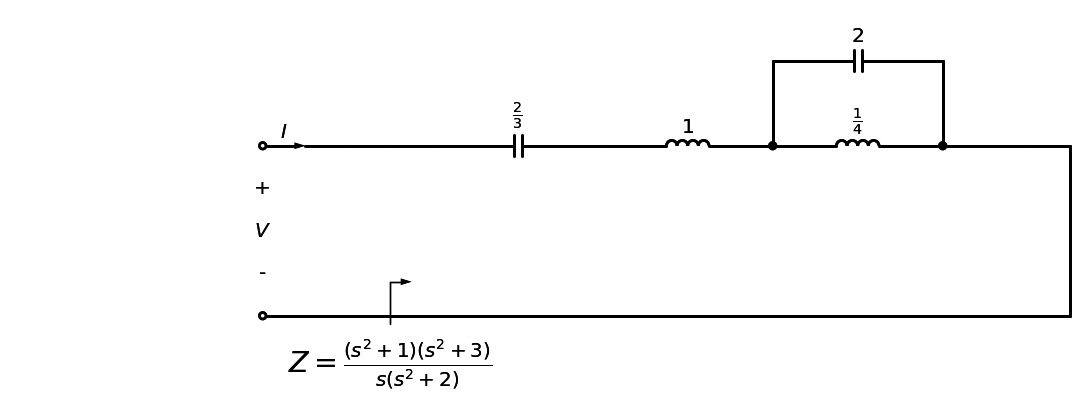

In [5]:
dibujar_foster_serie(k0, koo, ki, z_exc=Z)

### Simulación circuital de Z(s) (Modelo serie)

Procedemos a simular en LtSpice modulo y fase de la impedancia obtenida y aprovechamos para visualizar a modo comparativo la admitancia del circuito dual:

<img src="./rsc/sim/fosterSerie.png" align="center" width="1288" height="610" /> 

En la imagen se observa la posición de las singularidades. Para verificar que coincida con la expresión, utilizando los cursores se midieron los ceros de impedancia del circuito serie, que a su vez son los ceros de admitancia del circuito dual:

\begin{equation}
fz1 = \frac{1}{2\pi} = \boxed{159 mHz}
\end{equation}

\begin{equation}
fz2 = \frac{\sqrt3}{2\pi} = \boxed{275 mHz}
\end{equation}



### Sintesis de Y(s) (Modelo en derivación)

Procedemos a realizar la sinstesis del circuito en derivación:

In [6]:
Y = 1/Z
Y

s*(s**2 + 2)/((s**2 + 1)*(s**2 + 3))

In [7]:
params = foster(Y)
k0 = params[0]
koo = params[1]
ki= params[2]
print('El valor de K0 es: ' + str(k0))
print('El valor de Kinfinito es: ' + str(koo))
i = 1
for k in ki:
    print('El valor de K{} es: {}'.format(i,str( 1/k[-1]/2  )))
    i+=1

El valor de K0 es: None
El valor de Kinfinito es: None
El valor de K1 es: 1/4
El valor de K2 es: 1/4


Vemos que ahora los valores K0 y Kinfinito son nulos debido a que al sintetizar una admitancia los polos en 0 y en infinito ahora son ceros.

La función de excitación resultante es:

In [8]:
params[-1]

s/(2*(s**2 + 3)) + s/(2*(s**2 + 1))

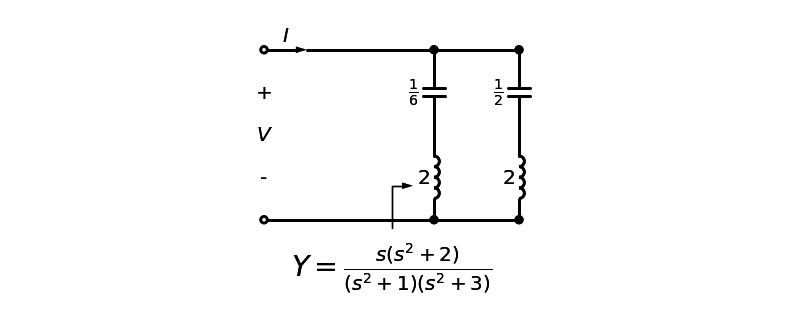

In [9]:
dibujar_foster_derivacion(k0, koo, ki, y_exc=Y)

### Simulación circuital de Y(s) (Modelo en Derivacion)

Procedemos a simular en LtSpice modulo y fase de la admitancia obtenida y aprovechamos para visualizar a modo comparativo la impedancia del circuito dual:

<img src="./rsc/sim/fosterDerivacion.png" align="center" width="1288" height="610" /> 

En la imagen se observa la posición de las singularidades. Para verificar que coincida con la expresión, utilizando los cursores se midieron los polos de admitancia del circuito paralelo, que a su vez son los polos de impedancia del circuito dual:

\begin{equation}
fp1 = \frac{1}{2\pi} = \boxed{159 mHz}
\end{equation}

\begin{equation}
fp2 = \frac{\sqrt3}{2\pi} = \boxed{275 mHz}
\end{equation}

<a name="b">
   <h2>b) Sintesis de Z(s) mediante el método de Cauer</h2>
</a>

El método de Cauer consiste en realizar remociones totales en 0 ó en infinito, por lo tanto también es un método canónico.



### Sintesis de Z(s) empleando Cauer 1

El método de Cauer 1 consiste en realizar remociones en infinito, empleamos nuevamente las funciones de la librería de la catedra para verificar los resultados obtenidos en el anexo:

In [10]:
koo, imm_cauer_oo, rem = cauer_LC(Z, remover_en_inf=True)

La función de excitación obtenida es:

In [11]:
imm_cauer_oo

s + 1/(s/2 + 1/(4*s + 6/s))

Y se sintetiza mediante los siguientes componentes:

In [12]:
koo

[s, s/2, 4*s, s/6]

Obteniendo el siguiente circuito:

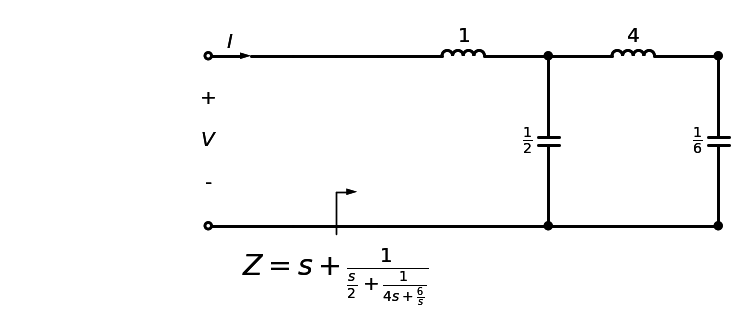

In [13]:
dibujar_cauer_LC(koo, z_exc = imm_cauer_oo)

### Simulación circuital de Z(s) (Cauer 1)

Verificamos modulo y fase de la función de excitación y de su circuito dual:

<img src="./rsc/sim/cauer1.png" align="center" width="1288" height="610" /> 

### Sintesis de Z(s) empleando Cauer 2

El método de Cauer 2 consiste en realizar remociones en cero:

In [14]:
k0, imm_cauer_0, rem = cauer_LC(Z, remover_en_inf=False)

La función de excitación obtenida es:

In [15]:
imm_cauer_0

1/(1/(5*s + 25/(2*s)) + 4/(5*s)) + 3/(2*s)

Y se sintetiza mediante los siguientes componentes:

In [16]:
k0

[3/(2*s), 4/(5*s), 25/(2*s), 1/(5*s)]

Obteniendo el siguiente circuito:

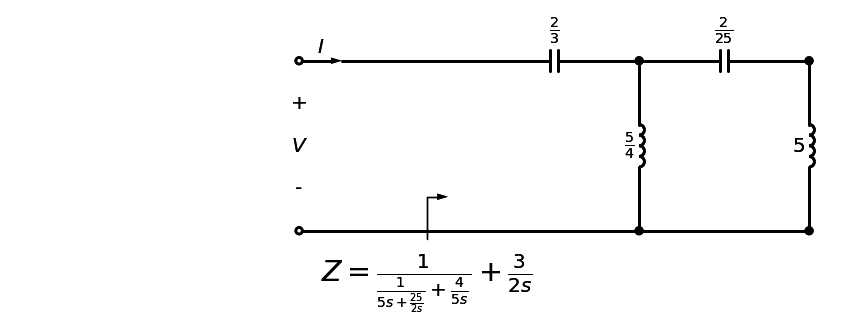

In [17]:
dibujar_cauer_LC(k0, z_exc = imm_cauer_0)

### Simulación circuital de Z(s) (Cauer 2)

Verificamos modulo y fase de la función de excitación y de su circuito dual:

<img src="./rsc/sim/cauer2.png" align="center" width="1288" height="610" /> 

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="parte2">
        <h1> PARTE 2</h1>
    </a> 
</center>
</div>


<img src="./rsc/consigna2.png" align="center" width="1196" height="599" />   

En este caso se debe sintetizar para llegar a la red dada y ademas se impone la frecuencia de resonancia de dos componentes. Esto implica que las remociones que se deben realizar son parciales para poder cumplir con las condiciones de diseño y por lo tanto el circuito obtenido no va ser canónico.

En el anexo se efectuó la sintesis por método gráfico y a continuación se verifican los calculos realizados.

En primer lugar construimos la función de excitación simbólica:

In [18]:
Y = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)
Y

3*s*(s**2 + 7/3)/((s**2 + 2)*(s**2 + 5))

<a name="c">
   <h2>Remociones parciales</h2>
</a>

###### 1) Realizamos una remoción parcial en 0 para ubicar el cero de impedancia que está en raiz de 2 en 1

In [19]:
omega_L2C2 = 1
Z2, Zc1 = remover_polo_dc(1/Y, omega_zero = omega_L2C2 )

In [20]:
C1 = 1/(s*Zc1)
print("Extrajimos un capacitor de {} F".format(str(C1)))

Extrajimos un capacitor de 1 F


Y la función queda: 

In [21]:
Z2

(s**2 + 1)*(s**2 + 3)/(s*(3*s**2 + 7))

###### 2) Realizamos la remoción total en s=1 para extraer el par de componentes que cumple con la condición de resonancia 

In [22]:
Y4, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2 )

Como estamos operando sobre una admitancia, se extrajo:

In [23]:
Yt2

2*s/(s**2 + 1)

In [24]:
print("Que corresponde con un capacitor y un inductor asociados en serie de valores: \n "
      "\nL2= {} H".format(L2) + '\n' +
      "\nC2= {} F".format(C2))

Que corresponde con un capacitor y un inductor asociados en serie de valores: 
 
L2= 1/2 H

C2= 2 F


La función resultante es:

In [25]:
Y4

s/(s**2 + 3)

###### 3) Realizamos una remoción total del polo que queda en raiz de 3 sin especificar el omega ya que no hay restricción en este punto

In [26]:
Y6, Yt3, L3, C3 = remover_polo_jw(Y4, isImpedance = False)

In [27]:
print("Se extrajo un capacitor y un inductor asociados en serie de valores: \n "
      "\nL3= {} H".format(L3) + '\n' +
      "\nC3= {} F".format(C3))

Se extrajo un capacitor y un inductor asociados en serie de valores: 
 
L3= 1 H

C3= 1/3 F


Finalmente ya no queda nada que extraer:

In [28]:
Y6

0

Dibujamos el circuito:

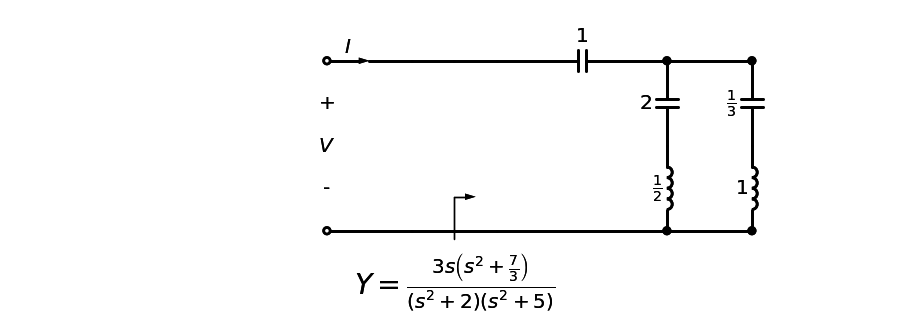

In [29]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')
d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 Y, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Capacitor, C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_derivacion(d, L3, C3)

display(d)

Donde podemos observar que la primera rama serie en derivación resuena a:

\begin{equation}
w = \sqrt{\frac{1}{L_2C_2}} = \sqrt{\frac{1}{\frac{1}{2}2}}  = 1 \frac{rad}{s}
\end{equation}

Cumpliendo con la consigna.

### Simulación circuital

A continuación se realiza la simulación del circuito en Lt Spice:

<img src="./rsc/sim/remParcial.png" align="center" width="1288" height="610" /> 

En la imagen se pueden observar la ubicación de las singularidades:

Polos:
\begin{equation}
p1 = \frac{\sqrt{2}}{2\pi} = 225 mHz
\end{equation}

\begin{equation}
p2 = \frac{\sqrt{5}}{2\pi} = 355 mHz
\end{equation}

Ceros:
\begin{equation}
z1 = \frac{\sqrt{\frac{7}{3}}}{2\pi} = 243 mHz
\end{equation}

Se debe tener en cuenta que también hay ceros en el origen y en infinito.

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="anexo">
        <h1> ANEXO </h1>
    </a> 
</center>
</div>


In [30]:
IFrame("./rsc/resolucion.pdf", width=1000, height=1000)

------------------------